In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
%load_ext autoreload
%autoreload 2

In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"
import helpers.hp_tuning

%run "$imports_path"

In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "tabGAN-qtr"

In [5]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME, version=6)
    curr_image_dir = os.path.join(const.dir.images_hp_v6(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v6(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v6(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/140 [00:00<?, ?it/s]

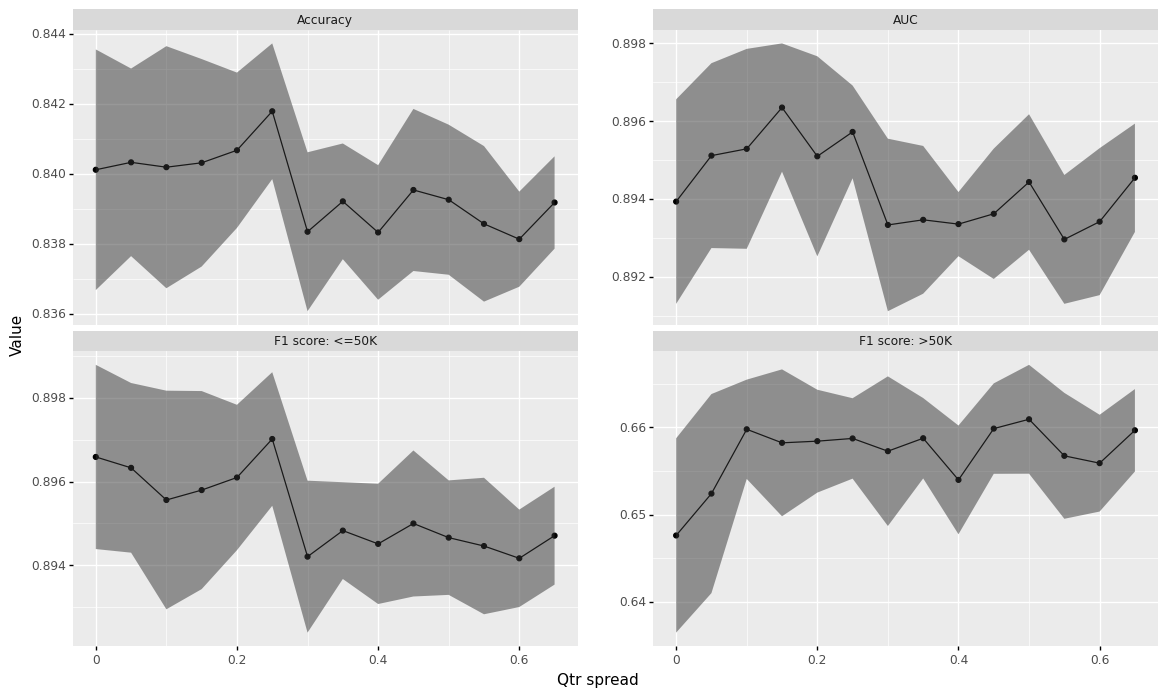

In [6]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [7]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.840120,0.893931,0.772101,0.896590,0.647611,0.003442,0.002630,0.006296,0.002202,0.011126
1,0.05,0.840332,0.895113,0.774367,0.896329,0.652405,0.002683,0.002377,0.005794,0.002028,0.011397
2,0.10,0.840193,0.895288,0.777665,0.895561,0.659769,0.003462,0.002570,0.003761,0.002613,0.005685
3,0.15,0.840319,0.896350,0.777008,0.895798,0.658219,0.002967,0.001649,0.004422,0.002367,0.008411
4,0.20,0.840677,0.895095,0.777254,0.896099,0.658409,0.002221,0.002573,0.003173,0.001738,0.005891
5,0.25,0.841793,0.895723,0.777870,0.897019,0.658721,0.001941,0.001193,0.002421,0.001597,0.004604
6,0.30,0.838347,0.893331,0.775734,0.894207,0.657262,0.002272,0.002218,0.004335,0.001816,0.008568
7,0.35,0.839216,0.893462,0.776787,0.894829,0.658745,0.001655,0.001900,0.002622,0.001157,0.004603
8,0.40,0.838327,0.893352,0.774243,0.894512,0.653975,0.001924,0.000825,0.003319,0.001438,0.006226
9,0.45,0.839542,0.893617,0.777424,0.894999,0.659848,0.002318,0.001676,0.003037,0.001745,0.005177


  0%|          | 0/50 [00:00<?, ?it/s]

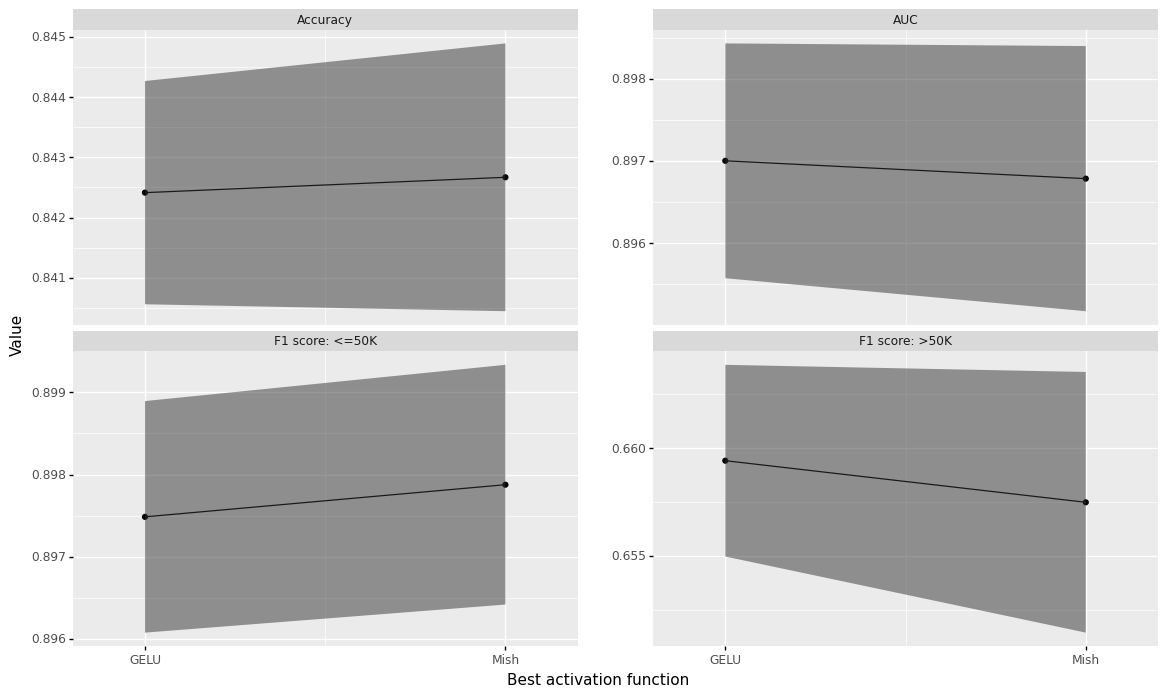

In [8]:
result_best_activation_function = plot_hp_tuning("best_activation_function")

In [9]:
result_best_activation_function

,Best activation function,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,GELU,0.842414,0.897003,0.778454,0.897486,0.659422,0.001855,0.001429,0.002514,0.001408,0.004445
1,Mish,0.842669,0.896786,0.777685,0.897877,0.657493,0.002225,0.001614,0.003572,0.001457,0.006044


  0%|          | 0/130 [00:00<?, ?it/s]

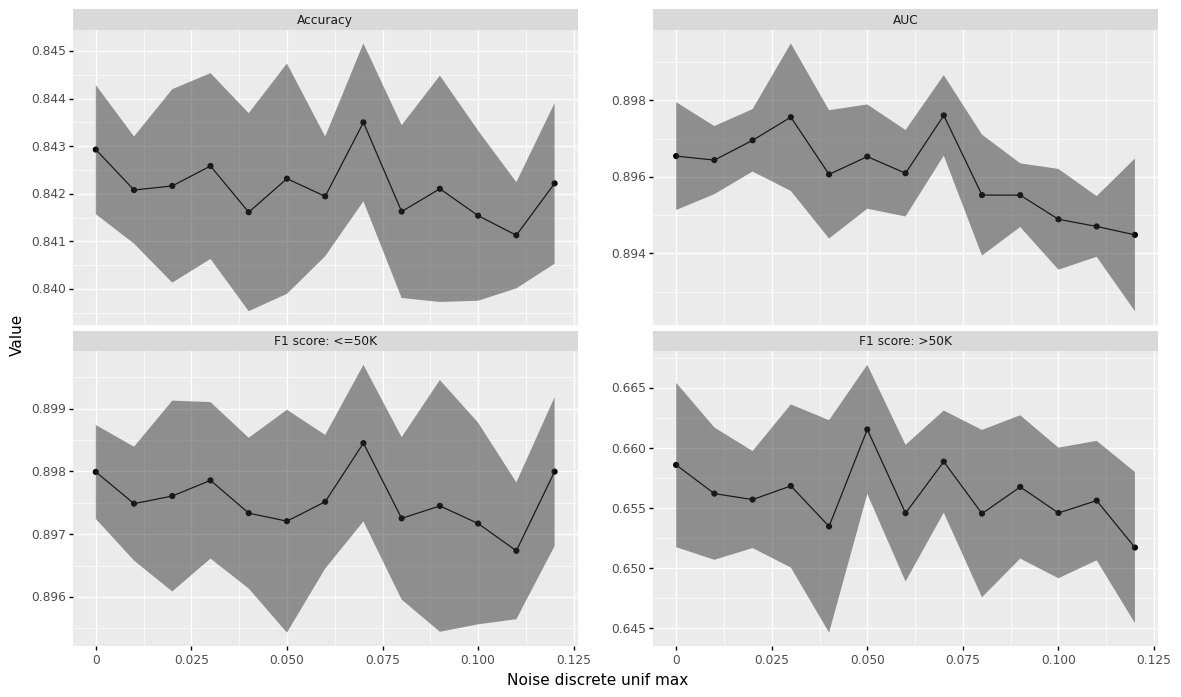

In [10]:
result_noise_discrete_unif_max = plot_hp_tuning("noise_discrete_unif_max")

  0%|          | 0/130 [00:00<?, ?it/s]

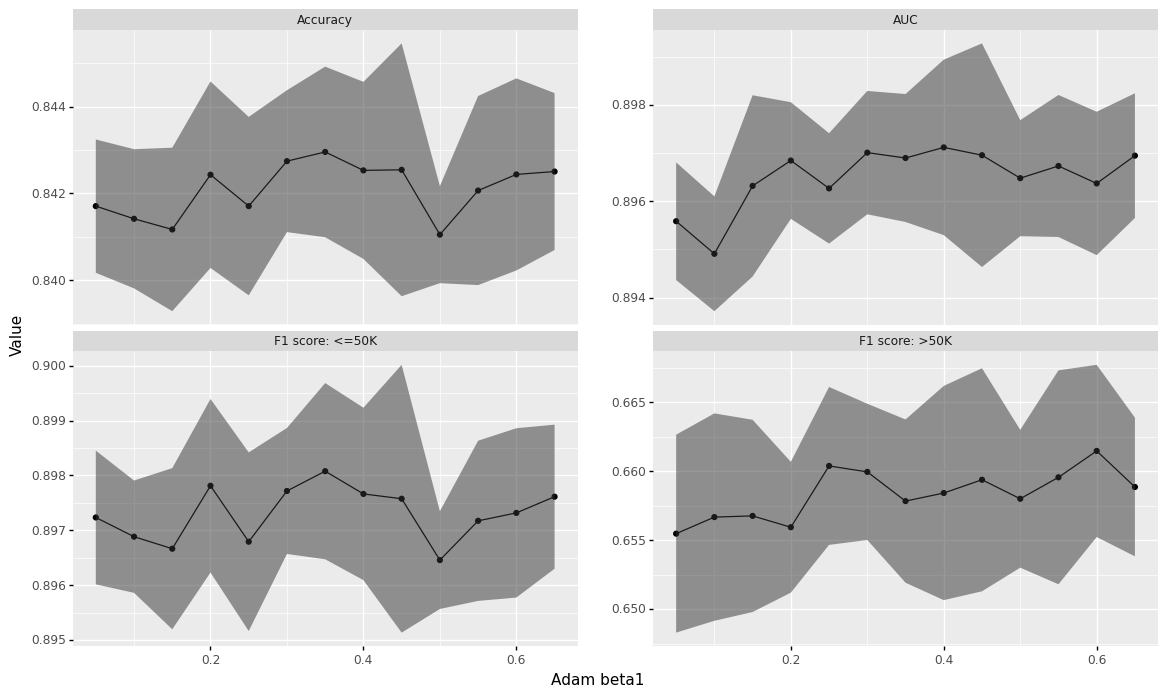

In [11]:
result_adam_beta1 = plot_hp_tuning("adam_beta1")

In [12]:
result_adam_beta1

,Adam beta1,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.05,0.841707,0.895587,0.776354,0.897233,0.655476,0.001536,0.001222,0.003556,0.001219,0.007181
1,0.10,0.841414,0.894910,0.776779,0.896883,0.656676,0.001604,0.001193,0.003915,0.001024,0.007524
2,0.15,0.841169,0.896321,0.776714,0.896664,0.656763,0.001884,0.001883,0.003552,0.001468,0.006974
3,0.20,0.842430,0.896847,0.776876,0.897811,0.655941,0.002149,0.001212,0.002809,0.001581,0.004745
4,0.25,0.841707,0.896269,0.778590,0.896791,0.660388,0.002056,0.001147,0.003036,0.001628,0.005729
5,0.30,0.842742,0.897012,0.778836,0.897716,0.659957,0.001635,0.001281,0.002745,0.001148,0.004944
6,0.35,0.842955,0.896900,0.777957,0.898077,0.657837,0.001966,0.001329,0.003016,0.001606,0.005922
7,0.40,0.842530,0.897120,0.778042,0.897662,0.658423,0.002041,0.001823,0.003969,0.001571,0.007770
8,0.45,0.842543,0.896958,0.778479,0.897575,0.659384,0.002913,0.002323,0.004095,0.002440,0.008092
9,0.50,0.841049,0.896481,0.777232,0.896456,0.658007,0.001118,0.001206,0.002481,0.000891,0.004999


  0%|          | 0/140 [00:00<?, ?it/s]

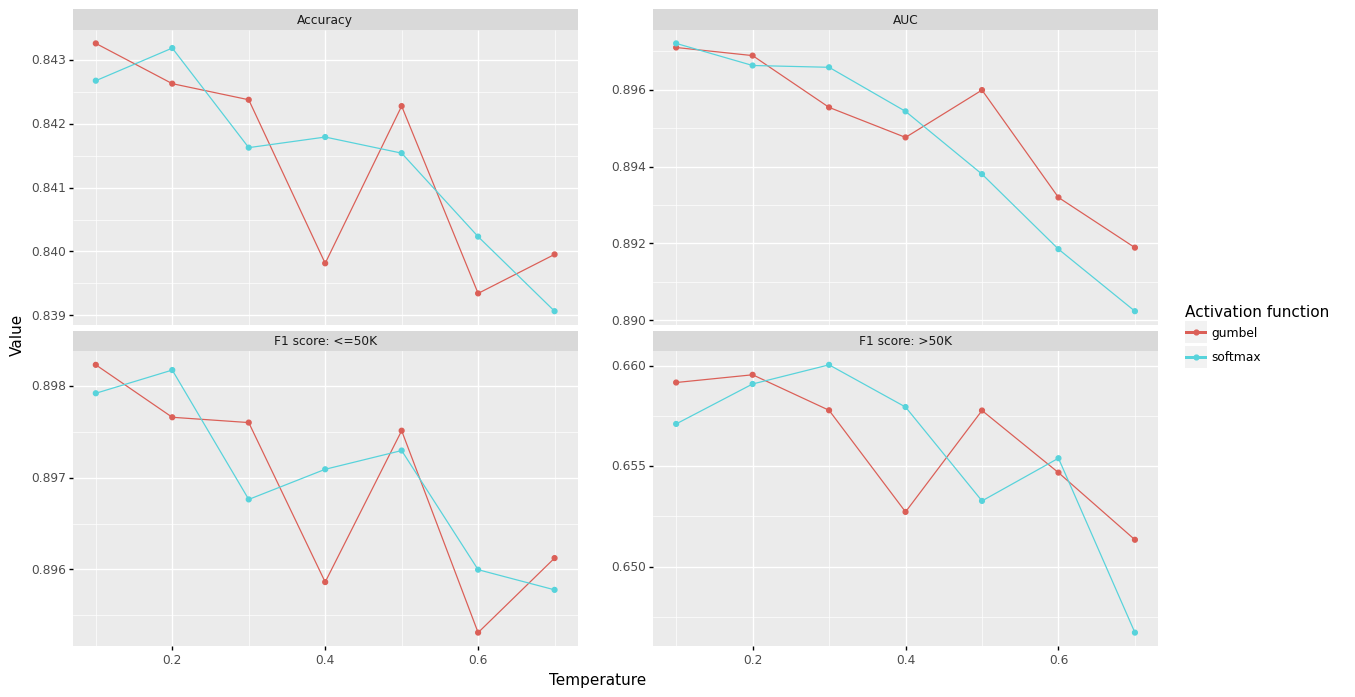

In [13]:
result_oh_encoding = plot_hp_tuning("oh_encoding")

  0%|          | 0/30 [00:00<?, ?it/s]

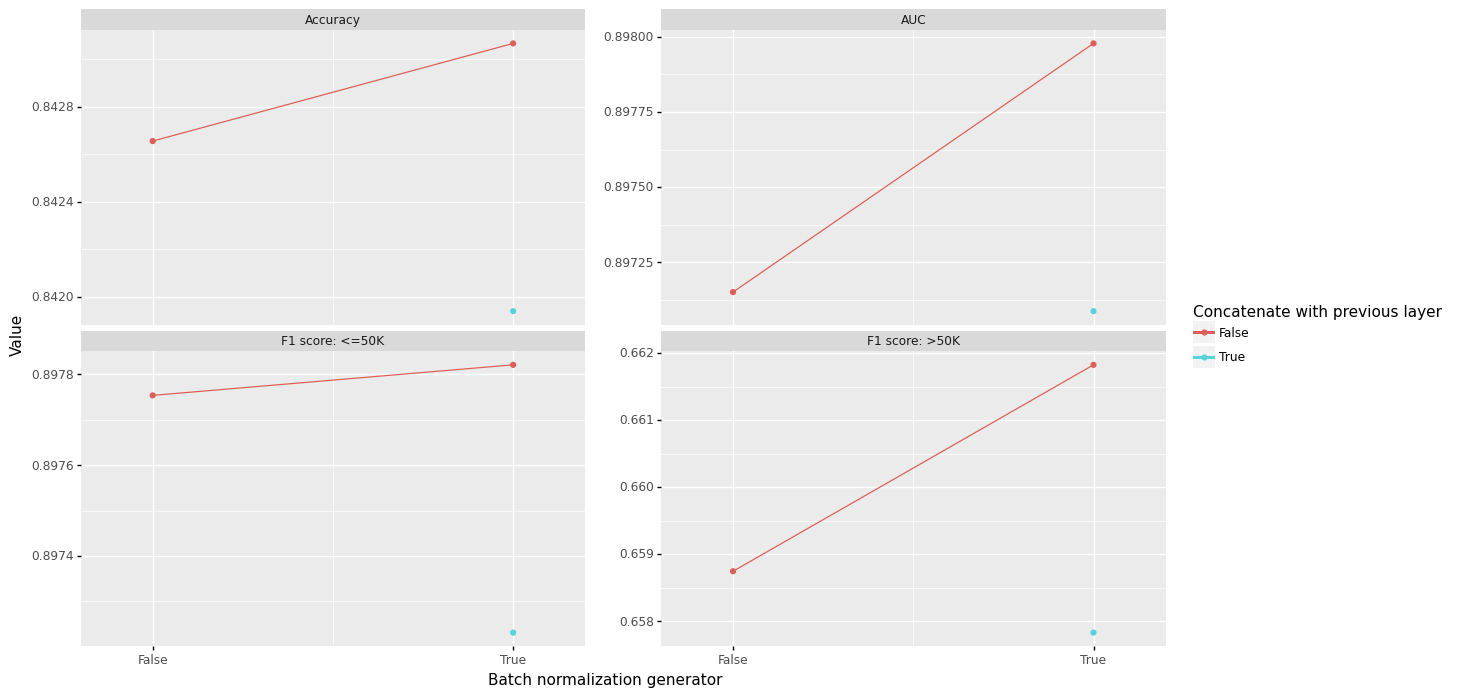

In [14]:
result_BN = plot_hp_tuning("BN")

In [15]:
result_BN

,Batch normalization generator,Concatenate with previous layer,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,0.842656,0.897151,0.778249,0.897754,0.658744,0.001830,0.001632,0.002632,0.001296,0.004455
1,True,False,0.843068,0.897978,0.779822,0.897821,0.661823,0.001871,0.001598,0.002753,0.001368,0.004866
2,True,True,0.841939,0.897087,0.777530,0.897231,0.657829,0.001444,0.001560,0.002716,0.000902,0.004823
